## Q1. You are working on a machine learning project where you have a dataset containing numerical and categorical features. You have identified that some of the features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates the feature engineering process and handles the missing values.

`Design a pipeline that includes the following steps:`

1. Use an automated feature selection method to identify the important features in the dataset.

`Create a numerical pipeline that includes the following steps:`
1. Impute the missing values in the numerical columns using the mean of the column values.
2. Scale the numerical columns using standardisation

`Create a categorical pipeline that includes the following steps:`
1. Impute the missing values in the categorical columns using the most frequent value of the column.
2. One-hot encode the categorical columns.

- Combine the numerical and categorical pipelines using a ColumnTransformer.
- Use a Random Forest Classifier to build the final model
- Evaluate the accuracy of the model on the test dataset.

Note! Your solution should include code snippets for each step of the pipeline, and a brief explanation of each step. You should also provide an interpretation of the results and suggest possible improvements for the pipeline.

In [10]:
import pandas as pd
df = pd.read_csv('Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df.shape

(1470, 35)

In [12]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# Checking missing values in dataset 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- No Missing values found in dataset
- Seperate X and Y

In [15]:
X = df.drop(labels=['Attrition'],axis=1)
Y = df[['Attrition']]
Y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [16]:
y_mapper = {'Yes':1,'No':0}
Y = Y.replace(y_mapper)
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [17]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [18]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [19]:
len(num_cols)

26

Feature selection for numerical columns

In [20]:
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, f_classif
X_num = X[num_cols]
k_best_numerical = SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,Y)
selected_num_features = list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

- Feature Selection for categorical variables

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
X_cat = X[cat_cols]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(oe.fit_transform(X_cat),columns=oe.get_feature_names_out())
k_best_categorical = SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,Y)
selected_cat_features = list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [23]:
selected_features = selected_num_features + selected_cat_features
selected_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [24]:
X_selected = X[selected_features]
X_selected.head()

,Age,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,3,2,4,5993,0,8,6,4,5,Sales,Life Sciences,Sales Executive,Single,Yes
1,49,2,2,2,5130,1,10,10,7,7,Research & Development,Life Sciences,Research Scientist,Married,No
2,37,2,1,3,2090,0,7,0,0,0,Research & Development,Other,Laboratory Technician,Single,Yes
3,33,3,1,3,2909,0,8,8,7,0,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,27,3,1,2,3468,1,6,2,2,2,Research & Development,Medical,Laboratory Technician,Married,No


In [25]:
X_selected.shape

(1470, 15)

- Feature Selection is completed
- Train Test Split of data

In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_selected,Y,test_size=0.2,random_state=42,stratify=Y)
xtrain.shape

(1176, 15)

In [29]:
xtest.shape

(294, 15)

In [30]:
ytrain.value_counts()

Attrition
0            986
1            190
dtype: int64

In [31]:
ytest.value_counts()

Attrition
0            247
1             47
dtype: int64

- Creating numeric and categorical pipeline

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

# Numeric Pipeline creation
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())])

# Categorical Pipeline creation
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                               ('one_hot_encoder',OneHotEncoder()),
                               ('scaler',StandardScaler(with_mean=False))])

- ColumnTransformer to combine numeric and Categorical pipelines

In [33]:
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [34]:
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [35]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,selected_num_features),
                                  ('cat_pipeline',cat_pipeline,selected_cat_features)])

- Transform the dataset with ColumnTransformer

In [37]:
xtrain_transformed = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest_transformed = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())
preprocessor.get_feature_names_out()

array(['num_pipeline__Age', 'num_pipeline__JobInvolvement',
       'num_pipeline__JobLevel', 'num_pipeline__JobSatisfaction',
       'num_pipeline__MonthlyIncome', 'num_pipeline__StockOptionLevel',
       'num_pipeline__TotalWorkingYears', 'num_pipeline__YearsAtCompany',
       'num_pipeline__YearsInCurrentRole',
       'num_pipeline__YearsWithCurrManager',
       'cat_pipeline__Department_Human Resources',
       'cat_pipeline__Department_Research & Development',
       'cat_pipeline__Department_Sales',
       'cat_pipeline__EducationField_Human Resources',
       'cat_pipeline__EducationField_Life Sciences',
       'cat_pipeline__EducationField_Marketing',
       'cat_pipeline__EducationField_Medical',
       'cat_pipeline__EducationField_Other',
       'cat_pipeline__EducationField_Technical Degree',
       'cat_pipeline__JobRole_Healthcare Representative',
       'cat_pipeline__JobRole_Human Resources',
       'cat_pipeline__JobRole_Laboratory Technician',
       'cat_pipeline__Job

In [38]:
xtrain_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,1.090194,1.795282,1.762189,-0.647997,2.026752,2.613100,2.261482,-0.665706,-0.625365,-0.616406,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
1,-1.634828,0.373564,-0.986265,1.153526,-0.864408,0.247430,-1.072675,-0.830071,-0.905635,-0.897047,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
2,0.981193,0.373564,1.762189,0.252765,2.347706,0.247430,1.492061,0.813578,1.336527,1.348076,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
3,-1.307825,0.373564,-0.986265,0.252765,-0.956202,-0.935405,-0.559727,-0.008246,-0.064824,0.506155,...,0.0,0.0,0.0,0.0,4.544641,0.000000,2.006697,0.0,2.205793,0.000000
4,0.654191,0.373564,-0.070114,0.252765,-0.185956,0.247430,-0.175017,0.156119,0.775986,0.786795,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,0.000000,2.205793


In [39]:
xtest_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,-1.416826,0.373564,-0.986265,-0.647997,-0.969745,0.247430,-1.329148,-0.994436,-1.185905,-1.177687,...,0.0,0.0,0.000000,0.0,4.544641,0.000000,2.006697,0.0,2.205793,0.000000
1,0.763191,1.795282,-0.986265,1.153526,-0.974474,0.247430,-0.175017,0.484849,0.215446,0.786795,...,0.0,0.0,2.564289,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
2,-0.653820,-1.048155,0.846038,1.153526,1.077650,0.247430,-0.175017,-0.336976,-0.064824,-0.897047,...,0.0,0.0,0.000000,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
3,0.763191,1.795282,2.678340,-1.548758,2.718533,1.430265,1.876772,2.950322,1.336527,2.470637,...,0.0,0.0,0.000000,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
4,-0.108815,-1.048155,-0.986265,0.252765,-0.678457,0.247430,-1.200911,-0.994436,-1.185905,-1.177687,...,0.0,0.0,2.564289,0.0,0.000000,0.000000,2.006697,0.0,0.000000,2.205793


- Training Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=21)
rfc.fit(xtrain_transformed,ytrain)

RandomForestClassifier(max_depth=8, random_state=21)

In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(rfc,xtrain_transformed,ytrain,cv=skf,scoring='accuracy')
scores

array([0.86440678, 0.85106383, 0.85957447, 0.86382979, 0.86382979])

In [42]:
import numpy as np
np.mean(scores)

0.8605409304002885

- Hyperparameter Tuning

In [44]:
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}


from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)


rscv.fit(xtrain_transformed,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.2s
[CV 2/5] END max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.855 total time=   0.2s
[CV 3/5] END max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.2s
[CV 4/5] END max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.838 total time=   0.2s
[CV 5/5] END max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.885 total time=   0.2s
[CV 1/5] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.869 total time=   0.5s
[CV 2/5] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.5s
[CV 3/5] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.855 total time=   0.5s
[C

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [45]:
RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)


- In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [46]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 9}

In [47]:
rscv.best_score_

0.8647962495492246

In [48]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=9, min_samples_leaf=3, n_estimators=300)


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
Evaluate model on test data

In [49]:
ypred_test = best_rfc.predict(xtest_transformed)
ypred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

<AxesSubplot: >

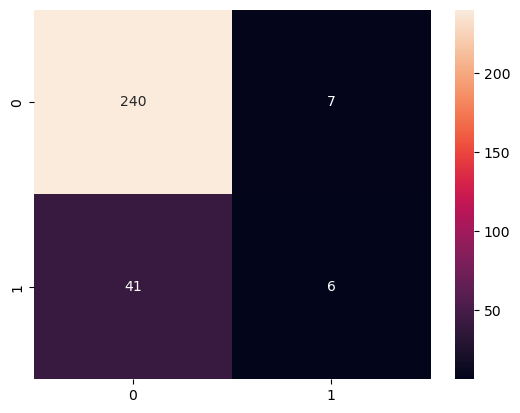

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

Insights
Above model has accuracy of 0.8503 on testing data
However above data has imbalance data on target
To deal with imbalanced techniques such as SMOTE (Synthetic Minority Oversampling TEchnique)
Feature selection can also be avoided in above data and performance should be checked with all features as well

## Q2. Build a pipeline that includes a random forest classifier and a logistic regression classifier, and then use a voting classifier to combine their predictions. Train the pipeline on the iris dataset and evaluate its accuracy.

In [4]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

#loading Iris dataset
df = sns.load_dataset("iris")
X = df.drop('species',axis =1)
y = df.species

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
categorical_features = []

# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define the categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine the numerical and categorical pipelines using a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Define the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the Logistic Regression Classifier
lr = LogisticRegression(random_state=42)

# Define the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    voting='soft'
)

# Define the final pipeline that includes the preprocessor and the Voting Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('voting', voting_clf)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the accuracy of the pipeline on the test data
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:
In this pipeline, we first define a numerical pipeline and a categorical pipeline that handle the missing values and apply scaling and one-hot encoding respectively. Then we combine these pipelines using a ColumnTransformer.

Next, we define the Random Forest Classifier and the Logistic Regression Classifier. We then define the Voting Classifier that combines the predictions of these classifiers.

Finally, we define the complete pipeline that includes the preprocessor and the Voting Classifier, and fit it on the training data. We evaluate the accuracy of the pipeline on the test data using the `score` method.

Note that we set the voting parameter of the `Voting` Classifier to `soft`, which means that the predicted probabilities of the classifiers are averaged to compute the final prediction. If we set it to `hard`, the class with the highest number of votes is selected as the final prediction.

The advantage of using a Voting Classifier is that it can improve the accuracy and robustness of the predictions by combining the strengths of multiple classifiers. The main limitation is that it may not work well if the individual classifiers have high correlation in their errors or predictions.